In [1]:
import tensorflow as tf
import os
import cv2
import imghdr

C:\Users\souna\AppData\Local\Temp\ipykernel_3788\1916308919.py:4: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [2]:
data_dir = 'data' 

In [3]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [4]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Issue with image data\happy\.ipynb_checkpoints


In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 306 files belonging to 2 classes.


In [7]:
data_iterator = data.as_numpy_iterator()

In [8]:
batch = data_iterator.next()

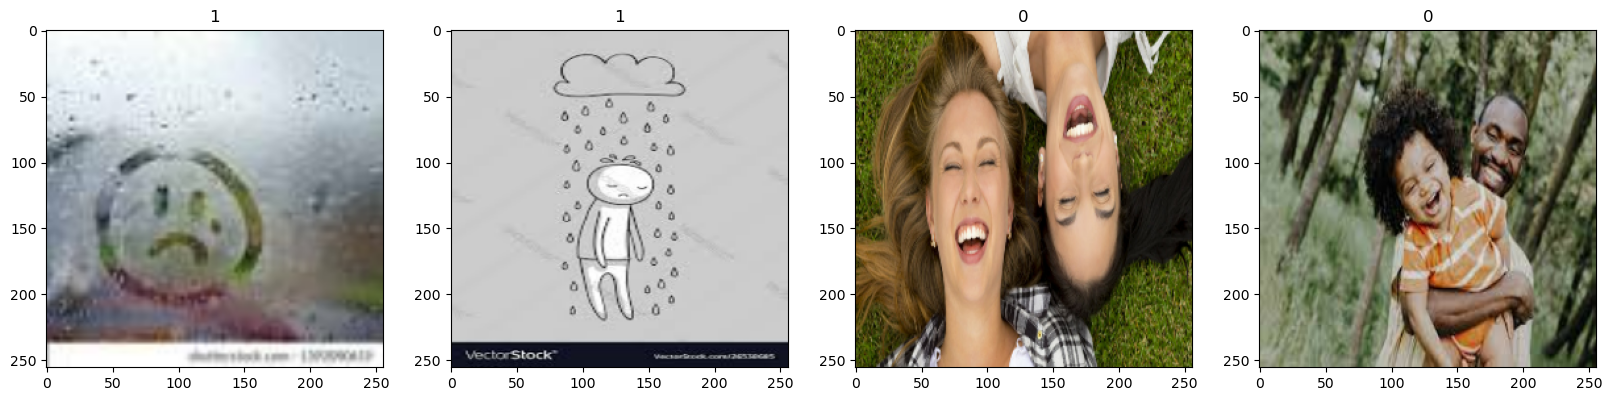

In [9]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [10]:
data = data.map(lambda x,y: (x/255, y))

In [11]:
data.as_numpy_iterator().next()

(array([[[[0.44705883, 0.46666667, 0.49019608],
          [0.44733456, 0.4669424 , 0.49019608],
          [0.45536152, 0.47496936, 0.49065563],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         [[0.44708782, 0.46669567, 0.49022508],
          [0.44972154, 0.4693294 , 0.49258307],
          [0.45536152, 0.47496936, 0.49065563],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         [[0.44861367, 0.46822152, 0.49175093],
          [0.45262715, 0.472235  , 0.49548867],
          [0.4568704 , 0.47647825, 0.49216452],
          ...,
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648],
          [0.07843138, 0.11372549, 0.14117648]],
 
         ...,
 
         [[0.        , 0.        , 0.        ],
          [0.     

In [12]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [13]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [15]:
model = Sequential()

In [16]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

D:\Anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
logdir='logs'

In [20]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [21]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 7s 436ms/step - accuracy: 0.4413 - loss: 1.6246 - val_accuracy: 0.5312 - val_loss: 0.6694
Epoch 2/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 508ms/step - accuracy: 0.5391 - loss: 0.6766 - val_accuracy: 0.4688 - val_loss: 0.7013
Epoch 3/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.5390 - loss: 0.6691 - val_accuracy: 0.5312 - val_loss: 0.6497
Epoch 4/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 559ms/step - accuracy: 0.6369 - loss: 0.6173 - val_accuracy: 0.7188 - val_loss: 0.5702
Epoch 5/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 510ms/step - accuracy: 0.6812 - loss: 0.6061 - val_accuracy: 0.7812 - val_loss: 0.4998
Epoch 6/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 486ms/step - accuracy: 0.8181 - loss: 0.4802 - val_accuracy: 0.7812 - val_loss: 0.4056
Epoch 7/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 549ms/step - accuracy: 0.7882 - loss: 0.4625 - val_accuracy: 0.8281 - val_loss: 0.3978
Epoch 8/20
7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 533ms/step - accuracy: 0.8483 - loss: 0.3815 - val_accuracy: 0.9219 - val_loss:

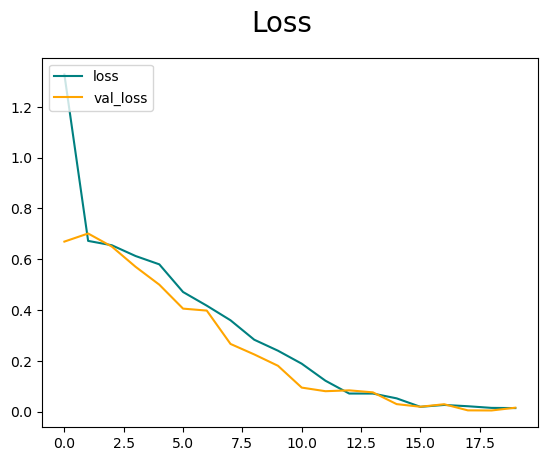

In [22]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

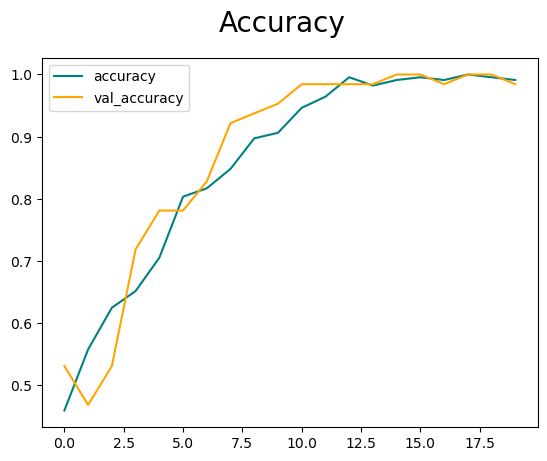

In [23]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [24]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [25]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [26]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step


In [27]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


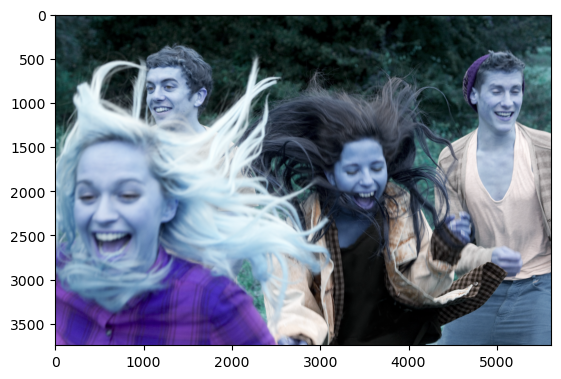

In [28]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

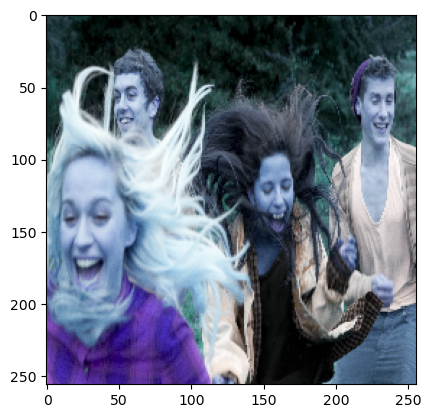

In [30]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [31]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


In [32]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


In [33]:
from tensorflow.keras.models import load_model

In [34]:
model.save(os.path.join('models','imageclassifier.h5'))

In [36]:
new_model = load_model('models/imageclassifier.h5')

In [37]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


array([[0.02147309]], dtype=float32)